# Exploring Emissions

In [1]:
### Import Libraries

# File manipulation

import os # For working with Operating System
from sys import platform # Diagnose operating system

# Analysis

import numpy as np # For working with Arrays
import pandas as pd # Data Manipulation
import geopandas as gpd # Spatial Data Manipulation

# Visualization

from pprint import pprint # Pretty Printing
import seaborn as sns
import matplotlib.pyplot as plt # Basic Plotting
import contextily # Base Map Visualization

import warnings
warnings.filterwarnings('ignore') # Ignores some warnings

In [2]:
### Definitions

cwd = os.getcwd() # Current Working Directory

# Forward or back slashs for filepaths? <- Not sure here. Only know Windows & Linux

if platform == "linux" or platform == "linux2":
    slash = '/'
elif platform == 'win32':
    slash = '\\'
    
    
def basic_stats(array):
    '''This function will print basic stats about an array'''
    
    print('Mean: ', array.mean())
    print('Medain ', array.median())
    print('Std. Devation: ', array.std())
    
    f, ax = plt.subplots(1,1, figsize = (6, 4))
    array.hist(bins = 20, ax = ax)
    plt.show()

In [3]:
# Load Data

# Extent

path = 'CleaningData' + slash + 'Boundary' + slash + 'mpls_boundary.geojson'
mpls_boundary = gpd.read_file(path)

# Emissions

path = 'CleaningData' + slash + 'PermittedEmissions' + slash + 'mpls_emissions.csv'
mpls_emissions = pd.read_csv(path) # Load csv

emissions = gpd.GeoDataFrame(mpls_emissions, geometry=gpd.points_from_xy\
                            (mpls_emissions.x, mpls_emissions.y),
                            crs = 'epsg:26915')

emissions.head()

,id,FACILITY_NAME,FACILITY_ID,INDUSTRY_TYPE,NAICS_CODE,YEAR,POLLUTANT,LBS_EMITTED,TONS_EMITTED,LONGITUDE,LATITUDE,x,y,geometry
0,71,Electric Machinery Co LLC,5300028,Manufacturing,335312,2006,Carbon Monoxide,3244.100,1.62,-93.2489,44.9919,480380.10882,4.982081e+06,POINT (480380.109 4982080.723)
1,72,Electric Machinery Co LLC,5300028,Manufacturing,335312,2006,Nitrogen Oxides,5186.400,2.59,-93.2489,44.9919,480380.10882,4.982081e+06,POINT (480380.109 4982080.723)
2,73,Electric Machinery Co LLC,5300028,Manufacturing,335312,2006,PM Primary,294.050,0.15,-93.2489,44.9919,480380.10882,4.982081e+06,POINT (480380.109 4982080.723)
3,74,Electric Machinery Co LLC,5300028,Manufacturing,335312,2006,PM10 Primary,286.800,0.14,-93.2489,44.9919,480380.10882,4.982081e+06,POINT (480380.109 4982080.723)
4,75,Electric Machinery Co LLC,5300028,Manufacturing,335312,2006,Sulfur Dioxide,21.912,0.01,-93.2489,44.9919,480380.10882,4.982081e+06,POINT (480380.109 4982080.723)


In [4]:
# Important values

facilities = emissions.dissolve('FACILITY_ID')[['FACILITY_NAME',
                                                'INDUSTRY_TYPE','NAICS_CODE',
                                                'geometry']] # facilitIes
years = emissions['YEAR'].unique() # Years

pprint(np.sort(emissions['POLLUTANT'].unique())) # Lot's of different pollutants

array(['1,1,1-Trichloroethane', '1,1,2,2-Tetrachloroethane',
       '1,1,2-Trichloroethane', '1,1-Dichloroethane',
       '1,2,3,4,6,7,8- Heptachlorodibenzodioxin',
       '1,2,3,4,6,7,8-Heptachlorodibenzofuran',
       '1,2,3,4,7,8,9-Heptachlorodibenzofuran',
       '1,2,3,4,7,8-Hexachlorodibenzodioxin',
       '1,2,3,4,7,8-Hexachlorodibenzofuran',
       '1,2,3,6,7,8-Hexachlorodibenzodioxin',
       '1,2,3,6,7,8-Hexachlorodibenzofuran',
       '1,2,3,7,8,9-Hexachlorodibenzodioxin',
       '1,2,3,7,8,9-Hexachlorodibenzofuran',
       '1,2,3,7,8- Pentachlordibenzofuran',
       '1,2,3,7,8- Pentachlorodibenzodioxin', '1,2,4-Trichlorobenzene',
       '1,2,4-Trimethylbenzene', '1,2-Dibromoethane',
       '1,2-Dichloroethane', '1,3,5-Trimethylbenzene', '1,3-Butadiene',
       '1,3-Dichloropropene', '1,4-Dichlorobenzene', '1,4-Dioxane',
       '2,2,4-Trimethylpentane', '2,3,4,6,7,8-Hexachlorodibenzofuran',
       '2,3,4,7,8- Pentachlordibenzofuran',
       '2,3,7,8-Tetrachlorodibenzo-P-Diox

In [5]:
# Let's start with 2020

# Emissions

emissions_2020 = emissions[emissions['YEAR']==2020][['FACILITY_NAME', 'INDUSTRY_TYPE', 'NAICS_CODE', 'POLLUTANT', 'LBS_EMITTED','geometry']]
vocs = emissions_2020[emissions_2020['POLLUTANT'] == 'Volatile Organic Compounds']
pm = emissions_2020[emissions_2020['POLLUTANT'] == 'PM Primary']

# Categorize PM & VOC emitters 

Mean:  5945.289948820513
Medain  1527.723
Std. Devation:  8448.546975287296


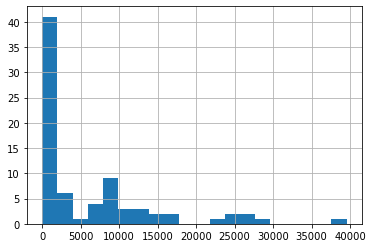

In [6]:
# Distribution?

## VOCS

basic_stats(vocs['LBS_EMITTED']) ### Hmm.... Let's Log?

Mean:  2.987317942732392
Medain  3.1836798180410906
Std. Devation:  1.0872271260604753


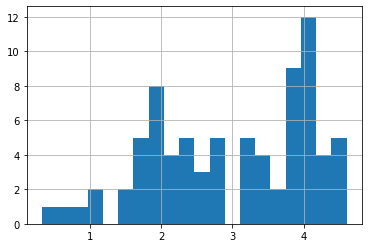

In [7]:
# Log

log_lbs = np.log10(vocs['LBS_EMITTED'])

basic_stats(log_lbs) # Looks like three distinct categories (modes) to me!

In [8]:
# Appears to be 3 & 7. <- if using natural log. Same results just different base

# print('\nvisual cutoffs from histograms')

# print('e^3 = ', np.exp(3)) # 20 lbs
# print('e^4 = ', np.exp(7)) # 1096 lbs


# Let's check this with FishJenks

# # These are FisherJenks Values for log cutoffs

# print('\n\nfisherjenks - log - 3 bins')
# print(np.exp(4.9)) # 134
# print(np.exp(7.91)) # 2724
# print(np.exp(10.59)) # MAX = 39735 lbs

# std = log_lbs.std()
# mean = log_lbs.mean()

# cutoffs = [10**(mean-std), 10**(mean), 10**(mean+std)]

# print(cutoffs)

# Let's do 
# 25lbs - low emissions
# 100lbs - mid-low
# 1000lbs - mid
# 10000lbs - High
# Above - Very High!

Mean:  6434.733691145679
Medain  267.6
Std. Devation:  14472.25985992391


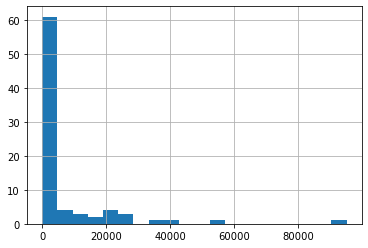

In [9]:
## PM

basic_stats(pm['LBS_EMITTED']) ### Hmm.... Let's Log?

In [10]:
# # Log

# log_lbs = np.log(pm['LBS_EMITTED'])

# basic_stats(log_lbs) # HMMM We get an error

# I'll check it out later

Years that dioxin emissions reported:  [2008 2011 2014 2017 2020]
Locations that reported:  ['University of MN - Twin Cities' 'Consolidated Container Co'
 'Hennepin Energy Recovery Center' 'Hennepin County Energy Center'
 'Aaron Carlson Corp' 'Abbott Northwestern Hospital'
 'Xcel Energy - Riverside Generating Plant'
 'NRG Energy Center Minneapolis' 'NRG Energy Center Minneapolis LLC'
 'GAF Materials Corp' 'Covanta Hennepin Energy Resource Co LP'
 'G&K Services - Minneapolis Industrial']


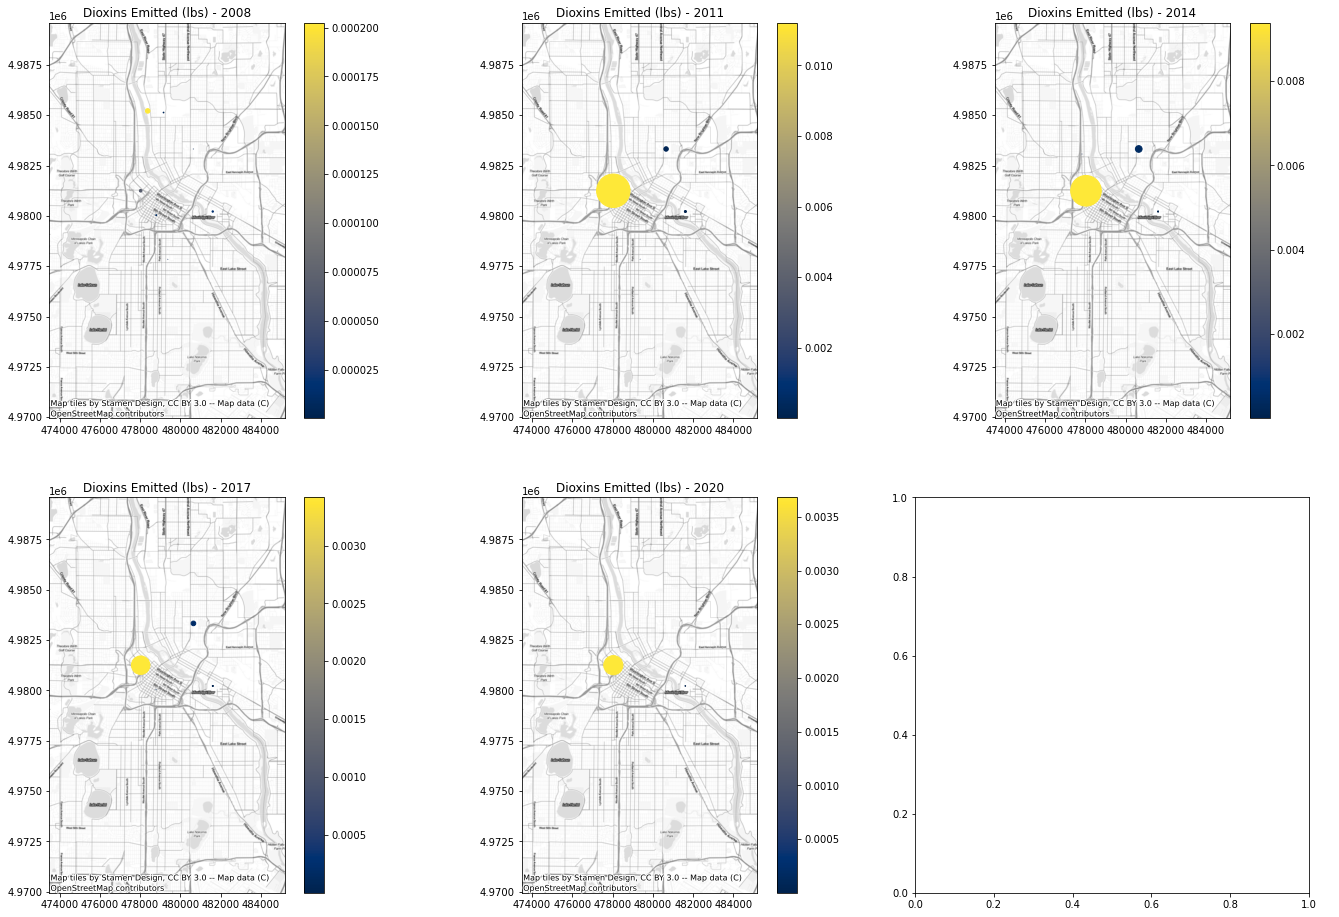

In [11]:
# Dioxyns

dioxins = emissions.query('POLLUTANT.str.contains("dioxin") or POLLUTANT.str.contains("Dioxin")', 
                          engine='python')[['FACILITY_NAME', 'YEAR', 'POLLUTANT', 'LBS_EMITTED','geometry']]

years = np.sort(dioxins.YEAR.unique())

facilities = dioxins.FACILITY_NAME.unique()

print('Years that dioxin emissions reported: ', years)

print('Locations that reported: ', facilities)

# dioxin_gp = dioxins.groupby(['YEAR', 'FACILITY_NAME']).sum() # This should be done

f, axs = plt.subplots(2, 3, figsize = (24, 16))

for i, ax in enumerate(axs.flat):
    
    if i < 5:
    
        year = years[i]
        
        data = dioxins[dioxins['YEAR']==year]
        
        title = 'Dioxins Emitted (lbs) - ' + str(year)
        
        
        mpls_boundary.plot(ax = ax, edgecolor='black', facecolor='white',
               alpha = .1)

        data.plot('LBS_EMITTED',
                     legend = True,
                    cmap = 'cividis',
                     ax = ax,
                     s = data['LBS_EMITTED']*100000
                    )


        contextily.add_basemap(ax = ax, 
                       crs = mpls_boundary.crs, 
                       source = contextily.providers.Stamen.TonerLite
                      )
        
        ax.set_title(title)

        
        # It appears that HERC that emits dioxins on a different scale than others, but these are small values

In [12]:
# Volatile Organic Compounds, PM Primary, PM10 Primary, and PM2.5 Primary



In [13]:
emissions.query('POLLUTANT.str.contains("dioxin")', engine='python')

,id,FACILITY_NAME,FACILITY_ID,INDUSTRY_TYPE,NAICS_CODE,YEAR,POLLUTANT,LBS_EMITTED,TONS_EMITTED,LONGITUDE,LATITUDE,x,y,geometry
6765,132039,NRG Energy Center Minneapolis LLC,5300011,Utilities,22133,2011,"1,2,3,4,6,7,8- Heptachlorodibenzodioxin",2.458600e-09,1.229300e-12,-93.2688,44.9735,478804.684747,4.980042e+06,POINT (478804.685 4980041.733)
6768,132042,NRG Energy Center Minneapolis LLC,5300011,Utilities,22133,2011,"1,2,3,4,7,8-Hexachlorodibenzodioxin",8.779800e-10,4.389900e-13,-93.2688,44.9735,478804.684747,4.980042e+06,POINT (478804.685 4980041.733)
6769,132043,NRG Energy Center Minneapolis LLC,5300011,Utilities,22133,2011,"1,2,3,6,7,8-Hexachlorodibenzodioxin",4.785800e-10,2.392900e-13,-93.2688,44.9735,478804.684747,4.980042e+06,POINT (478804.685 4980041.733)
6770,132044,NRG Energy Center Minneapolis LLC,5300011,Utilities,22133,2011,"1,2,3,7,8,9-Hexachlorodibenzodioxin",6.822800e-10,3.411400e-13,-93.2688,44.9735,478804.684747,4.980042e+06,POINT (478804.685 4980041.733)
6786,132060,NRG Energy Center Minneapolis LLC,5300011,Utilities,22133,2011,"Octachlorodibenzodioxins, All Isomers",2.017400e-09,1.008700e-12,-93.2688,44.9735,478804.684747,4.980042e+06,POINT (478804.685 4980041.733)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29062,474445,University of MN - Twin Cities,5301050,Other,61131,2020,"1,2,3,4,7,8-Hexachlorodibenzodioxin",9.132000e-08,4.566000e-11,-93.2332,44.9752,481612.345699,4.980222e+06,POINT (481612.346 4980221.889)
29063,474446,University of MN - Twin Cities,5301050,Other,61131,2020,"1,2,3,6,7,8-Hexachlorodibenzodioxin",7.466000e-08,3.733000e-11,-93.2332,44.9752,481612.345699,4.980222e+06,POINT (481612.346 4980221.889)
29064,474447,University of MN - Twin Cities,5301050,Other,61131,2020,"1,2,3,7,8,9-Hexachlorodibenzodioxin",9.374000e-08,4.687000e-11,-93.2332,44.9752,481612.345699,4.980222e+06,POINT (481612.346 4980221.889)
29087,474470,University of MN - Twin Cities,5301050,Other,61131,2020,"Octachlorodibenzodioxins, All Isomers",1.739800e-06,8.699000e-10,-93.2332,44.9752,481612.345699,4.980222e+06,POINT (481612.346 4980221.889)


In [14]:
# ## Query

# criteria = focus.loc[focus['Pollutant_gp'] == 'Criteria']
# toxics = focus.loc[focus['Pollutant_gp'] == 'Air toxic']

# ### Pollutants of interest

# crit_pollutants = criteria['Pollutant'].unique()
# toxic_pollutants = toxics['Pollutant'].unique()

# print('Criteria Pollutants', crit_pollutants) # Not too many
# # print(toxic_pollutants) # Lots! - I know the benchmarks for Benzene and Naphthalene? Part of Greater VOC Family

In [15]:
# ## Maybe sum them up?

# # Group by Year, facility, pollutant_gp
# tox_gp = toxics.groupby(['Year','Facility_ID', 'Pollutant_gp'])

# toxic_lbs = tox_gp.sum()

# # This is where I'll stop for now